In [1]:
import tensorflow as tf


In [2]:
mnist=tf.keras.datasets.mnist
(x_train,y_train),(x_test,y_test)=mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
x_train.shape

(60000, 28, 28)

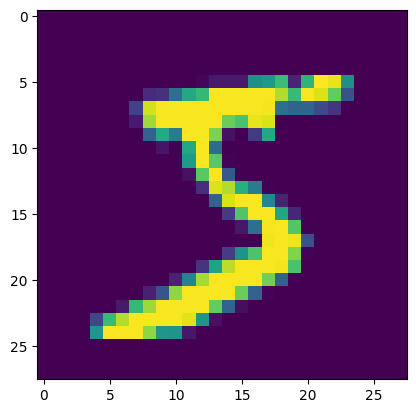

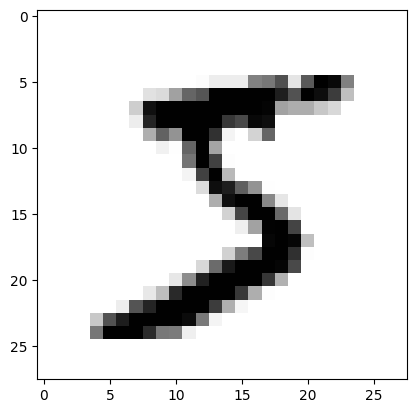

In [4]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0])
plt.show()
plt.imshow(x_train[0],cmap='binary')#color map
plt.show()

In [5]:
print(x_train[0]) #28*28 per image

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

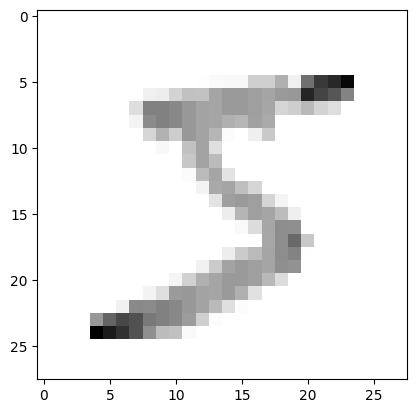

In [6]:
x_train=tf.keras.utils.normalize(x_train,axis=1)
x_test=tf.keras.utils.normalize(x_test,axis=1)
plt.imshow(x_train[0],cmap='binary')
plt.show()

In [7]:
print(x_train[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [8]:
#resizing imag to make it suitable for convolution neutal network

import numpy as np
# Define the image size
IMG_SIZE = 28
# Reshape the training data
x_train = np.array(x_train).reshape(-1, IMG_SIZE, IMG_SIZE, 1)  #increasing one dimension for kernel=filter operation
# Reshape the test data
x_test = np.array(x_test).reshape(-1, IMG_SIZE, IMG_SIZE, 1)   #increasing one dimension for kernel=filter operation
# Print the shape of the reshaped training data
print(x_train.shape)
# Print the shape of the reshaped test data
print(x_test.shape)


(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [9]:
#create deep neural network

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten,Conv2D,MaxPooling2D

In [11]:
#create a neural network
model=Sequential()
#add layers

#first convolution layer 0,1,2,3 (60000,28,28,1) 28-3+1=26X26
model.add(Conv2D(64,(3,3),input_shape=x_train.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

In [12]:
##2nd convolution layer
model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

In [13]:
##3rd convolution layer
model.add(Conv2D(64,(3,3),input_shape=x_train.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

In [14]:
##Fully connected layers #1
model.add(Flatten()) #before using fully connected layers need to be flatten so that 2D to 1D
model.add(Dense(64))
model.add(Activation("relu"))

In [15]:
##Fully connected layers #2
model.add(Dense(32))
model.add(Activation("relu"))

In [16]:
##last fully  connected layers , output must be equal to number of classes ,10
model.add(Dense(10))
model.add(Activation("softmax"))

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 activation (Activation)     (None, 26, 26, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 activation_1 (Activation)   (None, 11, 11, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                   

In [18]:
model.compile(loss="sparse_categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

In [19]:
print("Total Training Samples",len(x_train))

Total Training Samples 60000


In [20]:
model.fit(x_train,y_train,epochs=5,validation_split=0.3)  #training set

Epoch 1/5
1313/1313 [==============================] - 87s 64ms/step - loss: 0.3428 - accuracy: 0.8941 - val_loss: 0.1803 - val_accuracy: 0.9437
Epoch 2/5
1313/1313 [==============================] - 57s 44ms/step - loss: 0.1099 - accuracy: 0.9673 - val_loss: 0.0895 - val_accuracy: 0.9718
Epoch 3/5
1313/1313 [==============================] - 58s 44ms/step - loss: 0.0738 - accuracy: 0.9776 - val_loss: 0.0794 - val_accuracy: 0.9753
Epoch 4/5
1313/1313 [==============================] - 56s 43ms/step - loss: 0.0591 - accuracy: 0.9819 - val_loss: 0.0612 - val_accuracy: 0.9811
Epoch 5/5
1313/1313 [==============================] - 56s 43ms/step - loss: 0.0472 - accuracy: 0.9848 - val_loss: 0.0568 - val_accuracy: 0.9824


In [21]:
test_loss,test_acc=model.evaluate(x_test,y_test)
print("Test Accuracy",test_acc)
print("test loss",test_loss)

313/313 [==============================] - 3s 10ms/step - loss: 0.0530 - accuracy: 0.9852
Test Accuracy 0.9851999878883362
test loss 0.05296124890446663


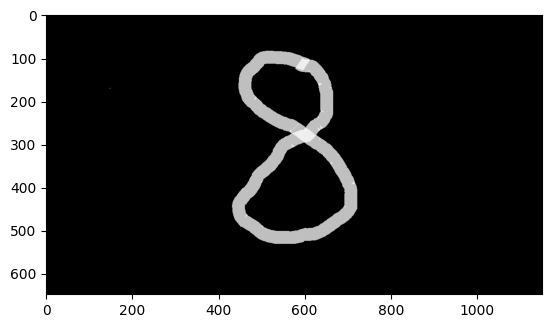

In [23]:
import cv2
import matplotlib.pyplot as plt

# Load the image using OpenCV
img = cv2.imread("eight.png")

plt.imshow(img)


In [24]:
img.shape

(648, 1152, 3)

In [25]:
Gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

In [26]:
Gray.shape

(648, 1152)

In [27]:
resized=cv2.resize(Gray,(28,28),interpolation=cv2.INTER_AREA)

In [28]:
resized.shape

(28, 28)

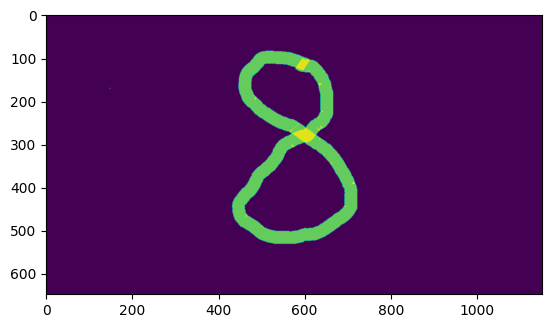

In [29]:
plt.imshow(Gray)

In [30]:
newimg=tf.keras.utils.normalize(resized,axis=1)

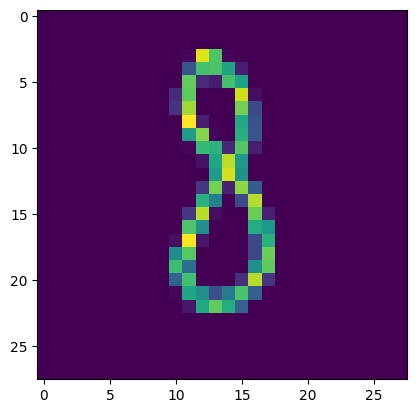

In [31]:
plt.imshow(newimg)

In [32]:
newimg=np.array(newimg).reshape(-1,IMG_SIZE,IMG_SIZE,1)

In [33]:
prediction=model.predict(newimg)

1/1 [==============================] - 0s 125ms/step


In [34]:
print(np.argmax(prediction))

8
